In [1]:
import sys
sys.path.insert(0, "/Users/do-hyungkwon/GoogleDrive/git/aiclass/1731095007_dohyungkwon/")

import tensorflux.graph as tfg
import tensorflux.deep_learning_networks as tfn
import tensorflux.enums as tfe
import datasource.mnist as mnist
import tensorflux.functions as tff
import math
%matplotlib inline
# pip install pygraphviz

In [2]:
input_size = 784
hidden_layer1_size = 128
hidden_layer2_size = 128
output_size = 10

x = tfg.Placeholder(name="x")
target = tfg.Placeholder(name="target")

n = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.SGD.value,
    learning_rate=0.01
)

In [3]:
# pip install pygraphviz
# n.draw_and_show(figsize=(20, 10))

In [6]:
#data = mnist.MNIST_Data()
data = mnist.MNIST_Data()

In [7]:
forward_final_output = n.feed_forward(input_data=data.test_input)
#print(forward_final_output.shape)
print("Initial Accuracy", tff.accuracy(forward_final_output, data.test_target))

batch_size = 1000
n.learning(max_epoch=100, data=data, batch_size=batch_size, print_period=1, verbose=False)#True

forward_final_output = n.feed_forward(input_data=data.test_input)
print("Post-learning Accuracy", tff.accuracy(forward_final_output, data.test_target))

Initial Accuracy 0.0837
Epoch   0 Completed - Train Error: 2.305916 - Validation Error: 2.304586 - Test Accuracy: 0.083700
Epoch   1 Completed - Train Error: 0.429221 - Validation Error: 0.432878 - Test Accuracy: 0.866600
Epoch   2 Completed - Train Error: 0.312274 - Validation Error: 0.271947 - Test Accuracy: 0.918800
Epoch   3 Completed - Train Error: 0.209906 - Validation Error: 0.219452 - Test Accuracy: 0.932700
Epoch   4 Completed - Train Error: 0.193393 - Validation Error: 0.188143 - Test Accuracy: 0.940800
Epoch   5 Completed - Train Error: 0.172521 - Validation Error: 0.165898 - Test Accuracy: 0.947300
Epoch   6 Completed - Train Error: 0.160300 - Validation Error: 0.149491 - Test Accuracy: 0.951100
Epoch   7 Completed - Train Error: 0.147249 - Validation Error: 0.136825 - Test Accuracy: 0.956400
Epoch   8 Completed - Train Error: 0.126788 - Validation Error: 0.126568 - Test Accuracy: 0.959400
Epoch   9 Completed - Train Error: 0.121571 - Validation Error: 0.118249 - Test Accur

KeyboardInterrupt: 

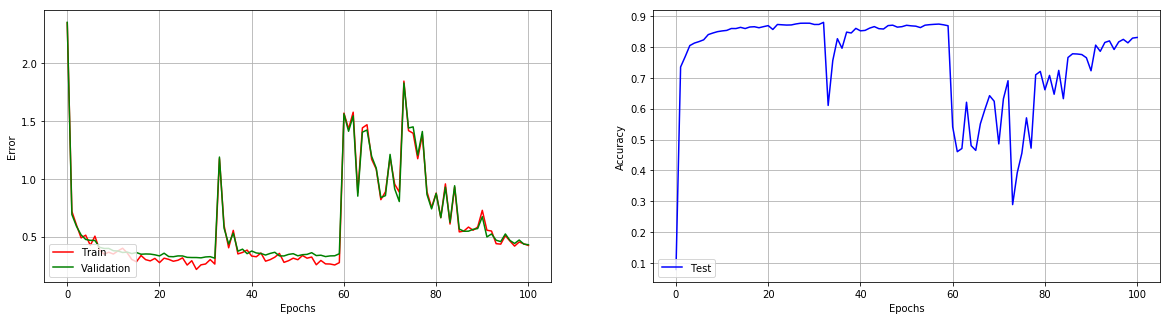

In [22]:
n.draw_error_values_and_accuracy(figsize=(20, 5))

False Prediction Index: 4, Prediction: pullover, Ground Truth: shirt
False Prediction Index: 12, Prediction: sandal, Ground Truth: sneaker
False Prediction Index: 17, Prediction: shirt, Ground Truth: coat
False Prediction Index: 23, Prediction: sandal, Ground Truth: ankle_boots
False Prediction Index: 25, Prediction: pullover, Ground Truth: coat


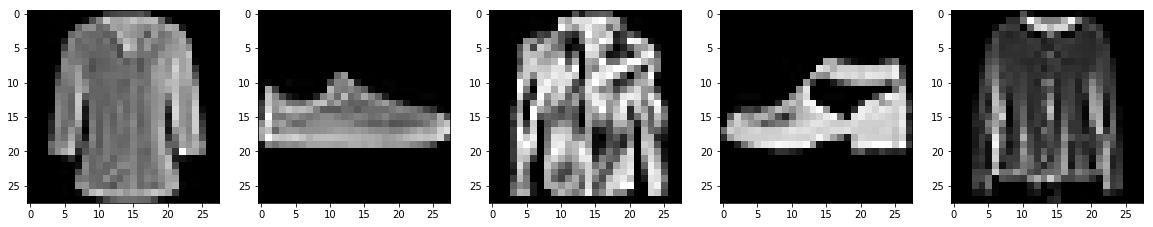

In [23]:
n.draw_false_prediction(data.test_input, data.test_target, data.labels, num=5, figsize=(20, 5))

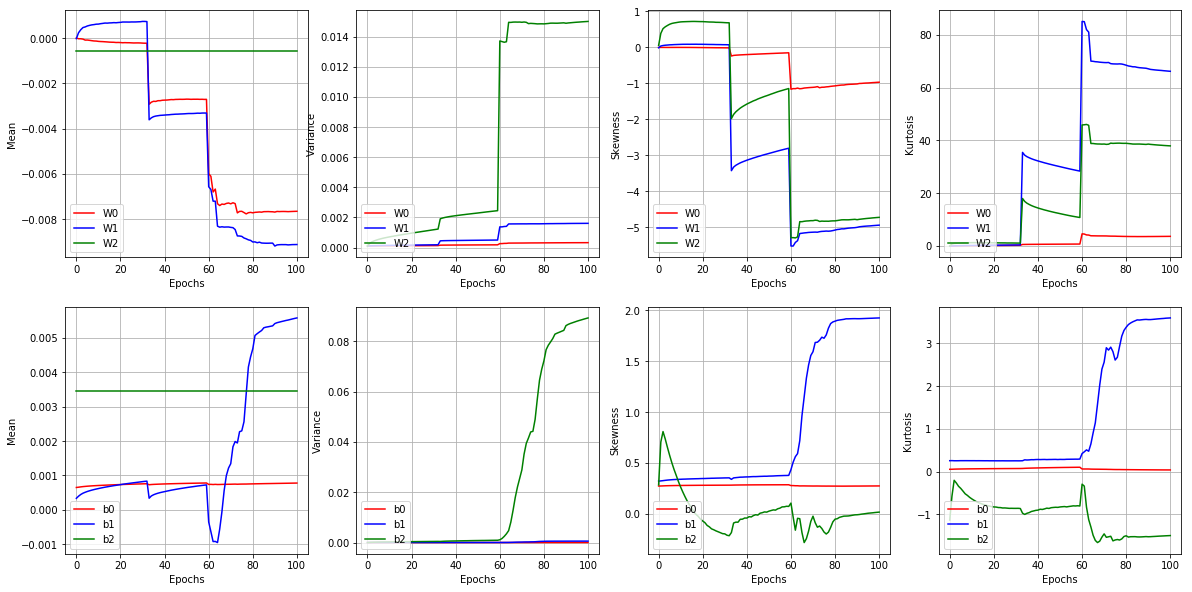

In [24]:
n.draw_param_description(figsize=(20, 10))